<h1 style= 'color: blue; font-size: 36px'>Guerra da Ucrania</h1>

<h1 style= 'font-size: 30px;'>Baixas Russas e Ucranianas</h1>
<hr style= 'border: 1px solid gray'>

In [127]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from itertools import count
plt.rc('figure', figsize= (14, 6))

## Dataset e Projeto
<hr>

### Fonte dataset: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

#### Descrição: 

<p style='font-size: 14px; margin: 10px 50px;'> Essa é uma visão geral das baixas russas na guerra da Ucrania baseado em uma dataset criado pelo o perfil <b>(Petro) Data Scientist, PhD na CheAI Lviv, Lviv Oblast, Ucraine</b>.</p>

<p style='font-size: 14px; margin: 10px 50px;'>O objetivo é fazer uma comparação da grande perca humana na guerra da Ucrania, observando as baixas dos dois lados da guerra e análisando de forma inteira somando ambos os lados de forma geral.</p>

In [128]:
dados = pd.read_csv('dados/russia_losses_personnel.csv')

In [129]:
dados

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
334,2023-01-25,336,123080,about,NaN
335,2023-01-26,337,123860,about,NaN
336,2023-01-27,338,124710,about,NaN
337,2023-01-28,339,125510,about,NaN


In [130]:
dados_ = dados.drop(columns=['personnel*', 'POW'])
dados_

,date,day,personnel
0,2022-02-25,2,2800
1,2022-02-26,3,4300
2,2022-02-27,4,4500
3,2022-02-28,5,5300
4,2022-03-01,6,5710
...,...,...,...
334,2023-01-25,336,123080
335,2023-01-26,337,123860
336,2023-01-27,338,124710
337,2023-01-28,339,125510


In [131]:
x= dados_['date']
y= dados_['personnel']

In [132]:
dados_['date'] = pd.to_datetime(dados_['date'])

### 1- Periodo 
<hr>

<p style='font-size: 14px'>O gráfico abaixo mostra o periode da coleta de dados de 25/2/2022 a 29/1/2023.</p>

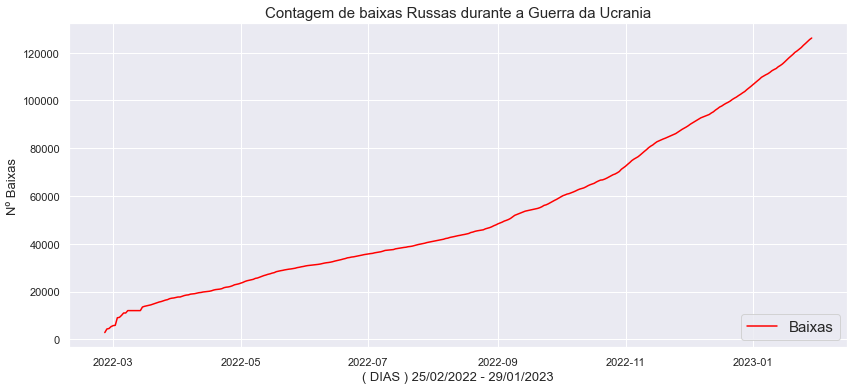

In [133]:
fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.plot(dados_['date'], y, color='red')
eixo.set_title('Contagem de baixas Russas durante a Guerra da Ucrania', fontsize=15)
eixo.set_ylabel('Nº Baixas', fontsize=13)
eixo.set_xlabel('( DIAS ) 25/02/2022 - 29/01/2023', fontsize=13)
eixo.legend(['Baixas'], loc= 'lower right', fontsize=15)

### 1.1 Começo do conflito 25/2 - 25/5
<hr>

<p style='font-size: 14px'>Em 25 de janeiro de 2022 a Rússia ilegalmente invadiu a Ucrânia e suas principais cidades inclusive a capital Kiev foi fortemente bombardeada, nas primeiras semanas a incursão Russa foi forte, garantido a superioridade aeria e terrestre, porem as tropas russas tiveram forte baixas no começo do conflito e no decorrer.</p>

In [134]:
import datetime

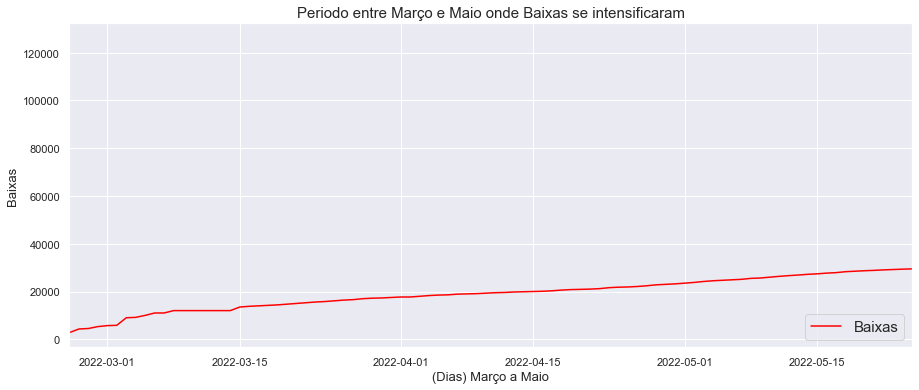

In [135]:
fig = plt.figure(figsize=(13,5))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.plot(dados_['date'], y, color='red')
#eixo.bar(dados_['date'], y)

eixo.set_xlim(datetime.datetime(2022,2,25), datetime.datetime(2022,5,25))
eixo.set_title('Periodo entre Março e Maio onde Baixas se intensificaram', fontsize=15)
eixo.set_ylabel('Baixas', fontsize=13)
eixo.set_xlabel('(Dias) Março a Maio', fontsize=13)
eixo.legend(['Baixas'], loc= 'lower right', fontsize=15)

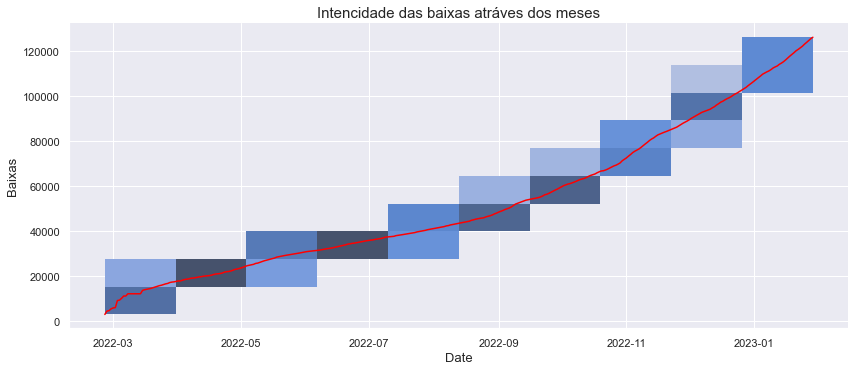

In [136]:
ax = sns.displot(data=dados_, x="date", y="personnel")
ax = sns.lineplot(data=dados_, x="date", y="personnel", color='red')
ax.set_title('Intencidade das baixas atráves dos meses', fontsize=15)
ax.set_ylabel('Baixas', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.figure.set_size_inches(14,5)

In [137]:
total_baixas = dados_['personnel'].sum()
total_baixas

17878406

Text(0.5, 0, 'Mês de Janeiro (2023)')

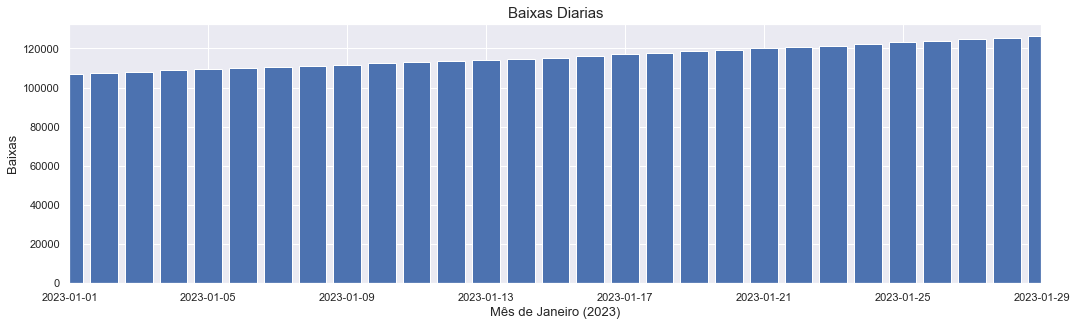

In [138]:
fig = plt.figure(figsize=(15,4))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.bar(dados_['date'], y)

eixo.set_xlim(datetime.datetime(2023,1,1), datetime.datetime(2023,1,29))
eixo.set_title('Baixas Diarias', fontsize=15)
eixo.set_ylabel('Baixas', fontsize=13)
eixo.set_xlabel('Mês de Janeiro (2023)', fontsize=13)

In [139]:
dados_days = dados_.drop(columns=['date'])
dados_days

,day,personnel
0,2,2800
1,3,4300
2,4,4500
3,5,5300
4,6,5710
...,...,...
334,336,123080
335,337,123860
336,338,124710
337,339,125510


In [140]:
dard = dados_days.set_index('day')
dard

,personnel
day,
2,2800
3,4300
4,4500
5,5300
6,5710
...,...
336,123080
337,123860
338,124710


In [141]:
#dard.to_csv('dard_ani.csv')

In [142]:
dfani = pd.read_csv('dados/dard_ani.csv')

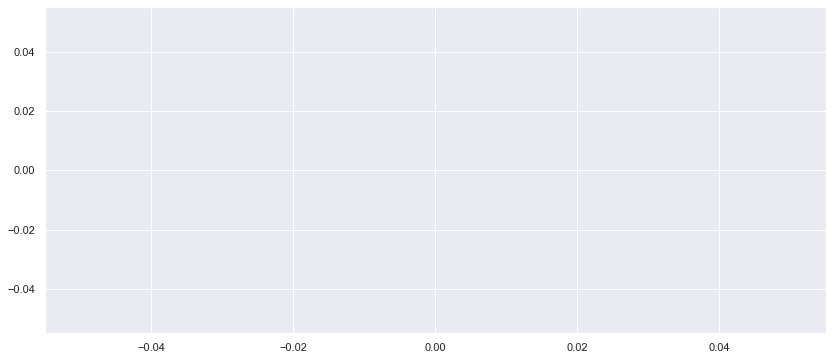

In [143]:
x=[]
y=[]

fig, ax= plt.subplots()
ax.plot(x, y)

contador= count(0, 1)
def update(i):
    idx=next(contador)
    x.append(dfani.iloc[idx, 0])
    y.append(dfani.iloc[idx, 1])
    plt.cla()
    ax.plot(x, y)

ani= animation.FuncAnimation(fig=fig, func=update, interval=200)
ani